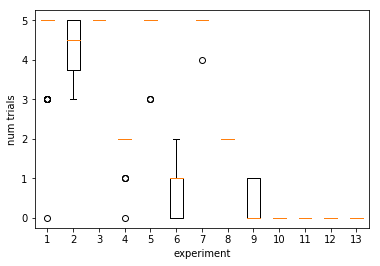

In [7]:
import re
import matplotlib.pyplot as plt

# for token in user_input.split():
#     try:
#         # if this succeeds, you have your (first) float
#         print float(token), "is a float"
#     except ValueError:
#         print token, "is something else"

f = open('/home/aran/itev2/limbo/dcfoptimize.log')
#f = open('/home/aran/itev2/limbo/boopt.log')
line = f.readline()

trials_per_exp = []
parameters_per_exp = []
flag = 0
counter = 0
trials = []
while line:
    line = f.readline()
    if line.startswith("loaded archive"):
        flag = 0
        
    if line.startswith("this is the value") and flag >= 1:
        if flag >= 1:
            results = re.findall(r"[-+]?\d*\.\d+|\d+", line)
            trials_per_exp.append(int(results[1]))
            
        line = f.readline() #contains alpha and length values
        numbers = re.findall(r"[-+]?\d*\.\d+|\d+", line)
        if float(numbers[1]) > 1:
            numbers[1] = 0
        
        if float(numbers[2]) > 1:
            numbers[2] = 0
        parameters = [float(numbers[1]), float(numbers[2])]
        parameters_per_exp.append(parameters)
        
        flag+=1
        counter+=1

    elif line.startswith("this is the value"):
        flag+=1
        

f.close()

# iterate through 40, box plot the trials
trial_boxes = []
for i in range(int(len(trials_per_exp)/40) - 1):
    trial_boxes.append(trials_per_exp[i*40:(i+1)*40])

plt.boxplot(trial_boxes)
plt.ylabel("num trials")
plt.xlabel("experiment")
# plt.savefig(directory + "/" + directory + ".pdf")
plt.show()

In [4]:
len(trials_per_exp)/40

7.125

In [19]:
trials_per_exp[0]

5

In [9]:
print(parameters_per_exp[0])
print(trials_per_exp[0])

best_params = []
for i in range(len(parameters_per_exp)):        
    if trials_per_exp[i] == 5:
        best_params.append(parameters_per_exp[i])

avg_1 = 0
avg_2 = 0
for i in range(len(best_params)):
    avg_1 += best_params[i][0]
    avg_2 += best_params[i][1]
    
avg_1 = avg_1 / len(best_params)
avg_2 = avg_2 / len(best_params)
print(avg_1)
print(avg_2)

[1.0, 0.0]
5
0.42291988898203603
0.3650945362155687


In [8]:
len(trials_per_exp[0:40])

40

In [4]:
best_params

[[0.4, 0.4],
 [0.4, 0.4],
 [0.4, 0.4],
 [1.0, 0.381473],
 [0.968811, 0.270076],
 [0.893606, 0.303219],
 [0.4, 0.4],
 [0.4, 0.4],
 [0.862495, 0.296497],
 [0.776122, 0.345936]]